In [1]:
import pandas as pd

data = pd.read_csv('../data/train.csv')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
## Limpieza de datos

In [5]:
types = data.dtypes

In [6]:
def convertirPiesAMetros(pies):
    return pies*0.3048

def convertirPiesCuadradosAMetros(piesCuadrados):
    return piesCuadrados*0.092903

In [7]:
data['LotFrontage']= list(map(convertirPiesAMetros,data['LotFrontage']))
data['LotArea'] = list(map(convertirPiesCuadradosAMetros,data['LotArea']))

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0000,365.750000,730.500000,1095.250000,1460.000000
MSSubClass,1460.0,56.897260,42.300571,20.0000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.0,21.351227,7.401992,6.4008,17.983200,21.031200,24.384000,95.402400
LotArea,1460.0,977.044879,927.289456,120.7739,701.742811,880.581085,1077.814155,19996.906235
OverallQual,1460.0,6.099315,1.382997,1.0000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.0,5.575342,1.112799,1.0000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.0,1971.267808,30.202904,1872.0000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.0,103.685262,181.066207,0.0000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.0,443.639726,456.098091,0.0000,0.000000,383.500000,712.250000,5644.000000


In [9]:
null_cols=data.isnull().sum()
#columnas con más del 10% de datos vacíos
cols_index = list(null_cols[null_cols>(len(data)*0.1)].index)
cols_index
# LotFrontage = largo de la propiedad que colinda con la calle
# Alley = Tipo de entrada
#FireplaceQu = Calidad de Chimenea
#PooQU = Calidad de la piscina
#Fence = Calidad de la barda
#MiscFeature = Otras cualidades

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [10]:
data = data.drop(cols_index,axis = 1)

In [11]:
null_cols=data.isnull().sum()
#columnas con más del 10% de datos vacíos
cols_index = list(null_cols[null_cols>(len(data)*0.1)].index)
cols_index

[]

In [12]:
cols_index = list(null_cols[null_cols>(len(data)*0.05)].index)
cols_index

['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

In [13]:
data = data.drop(['GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],axis = 1)

In [14]:
#Se conserva GarageType ya que en esta columna se puede identificar que casas tienen garage
null_cols=data.isnull().sum()
cols_index = list(null_cols[null_cols>(len(data)*0.05)].index)
cols_index

['GarageType']

In [15]:
#Para eliminar los datos nulos
data['GarageType'] = data['GarageType'].fillna('No Garage')

In [16]:
null_cols=data.isnull().sum()
#columnas con al menos un dato nulo
cols_index = list(null_cols[null_cols>0].index)
cols_index

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical']

In [17]:
#El material de la fachada influye en la columna del area de la fachada.

data[data['MasVnrType'].isnull()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [18]:
data['MasVnrType'] = data['MasVnrType'].fillna('No Masonry')
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

In [19]:
null_cols=data.isnull().sum()
#columnas con al menos un dato nulo
cols_index = list(null_cols[null_cols>0].index)
cols_index

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical']

In [20]:
#Casas sin base
data[data['BsmtQual'].isnull()][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


In [21]:
data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('No Basement')

In [22]:
null_cols=data.isnull().sum()
#columnas con al menos un dato nulo
cols_index = list(null_cols[null_cols>0].index)
cols_index

['Electrical']

In [23]:
#Es solo los datos de un registro por lo que se elimina todo 
data = data.drop(list(data[data['Electrical'].isnull()].index),axis=0)


In [24]:
null_cols=data.isnull().sum()
#columnas con al menos un dato nulo
cols_index = list(null_cols[null_cols>0].index)
cols_index
#Ya no hay nulos en la base de datos

[]

In [25]:
data.to_csv('../data/clean_data.csv',index=False)

In [26]:
# Es una vista general de los datos ahora limpios, no he pasado todas las áreas a metros cuadrados, sólo el área del terreno
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,730.054832,421.411181,1.0000,365.500000,730.000000,1094.500000,1460.000000
MSSubClass,1459.0,56.881426,42.310746,20.0000,20.000000,50.000000,70.000000,190.000000
LotArea,1459.0,977.094663,927.605450,120.7739,701.324747,880.441731,1077.953509,19996.906235
OverallQual,1459.0,6.100069,1.383171,1.0000,5.000000,6.000000,7.000000,10.000000
OverallCond,1459.0,5.575737,1.113079,1.0000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1459.0,1971.244003,30.199555,1872.0000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1459.0,1984.850583,20.644343,1950.0000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1459.0,103.187800,180.773158,0.0000,0.000000,0.000000,164.500000,1600.000000
BsmtFinSF1,1459.0,443.943797,456.106417,0.0000,0.000000,384.000000,712.500000,5644.000000
BsmtFinSF2,1459.0,46.581220,161.369977,0.0000,0.000000,0.000000,0.000000,1474.000000


In [27]:
matriz_correlaciones = data.corr()

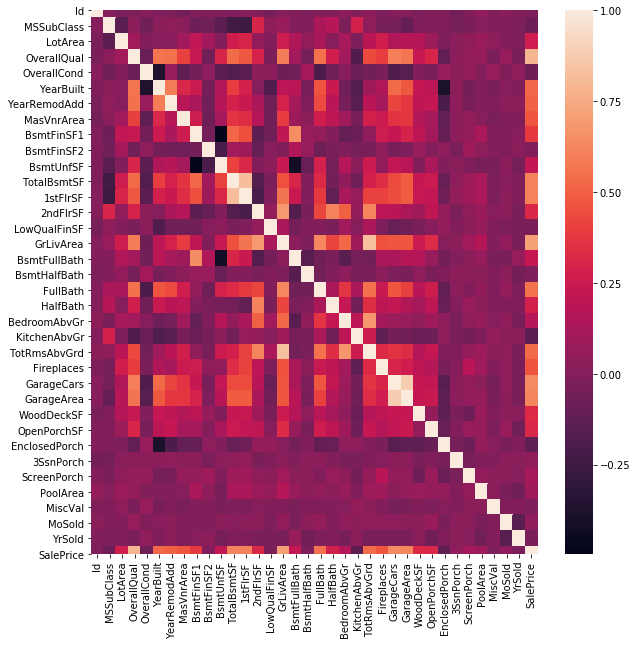

In [28]:
#Realizo una vista general de las correlaciones de datos
plt.figure(figsize=(10,10))
sns.heatmap(matriz_correlaciones)

#Me percaté que muchas variables están fuertemente correlacionadas entre sí ya que algunas columnas tienen datos categoricos
#que se describen a detalle en otras columnas, por ejemplo, el tipo de garage que se tienen y el área del garage.

In [29]:
# Aquí veo que variables están fuertemente correlacionadas con el precio de venta del inmueble, y tomaré aquellas
#características que tengan más del 0.5 de correlacion.
#Tomaré el 0.5 ya que sí tomará los mayores a 0.4 sólo se agregarían dos categorías más, las cuáles no aportarían mucho
#al análisis
corr_precios = matriz_correlaciones['SalePrice'].sort_values(ascending=False)
cols = list(corr_precios[corr_precios > 0.5].index)

In [30]:
corr_data = data[cols]

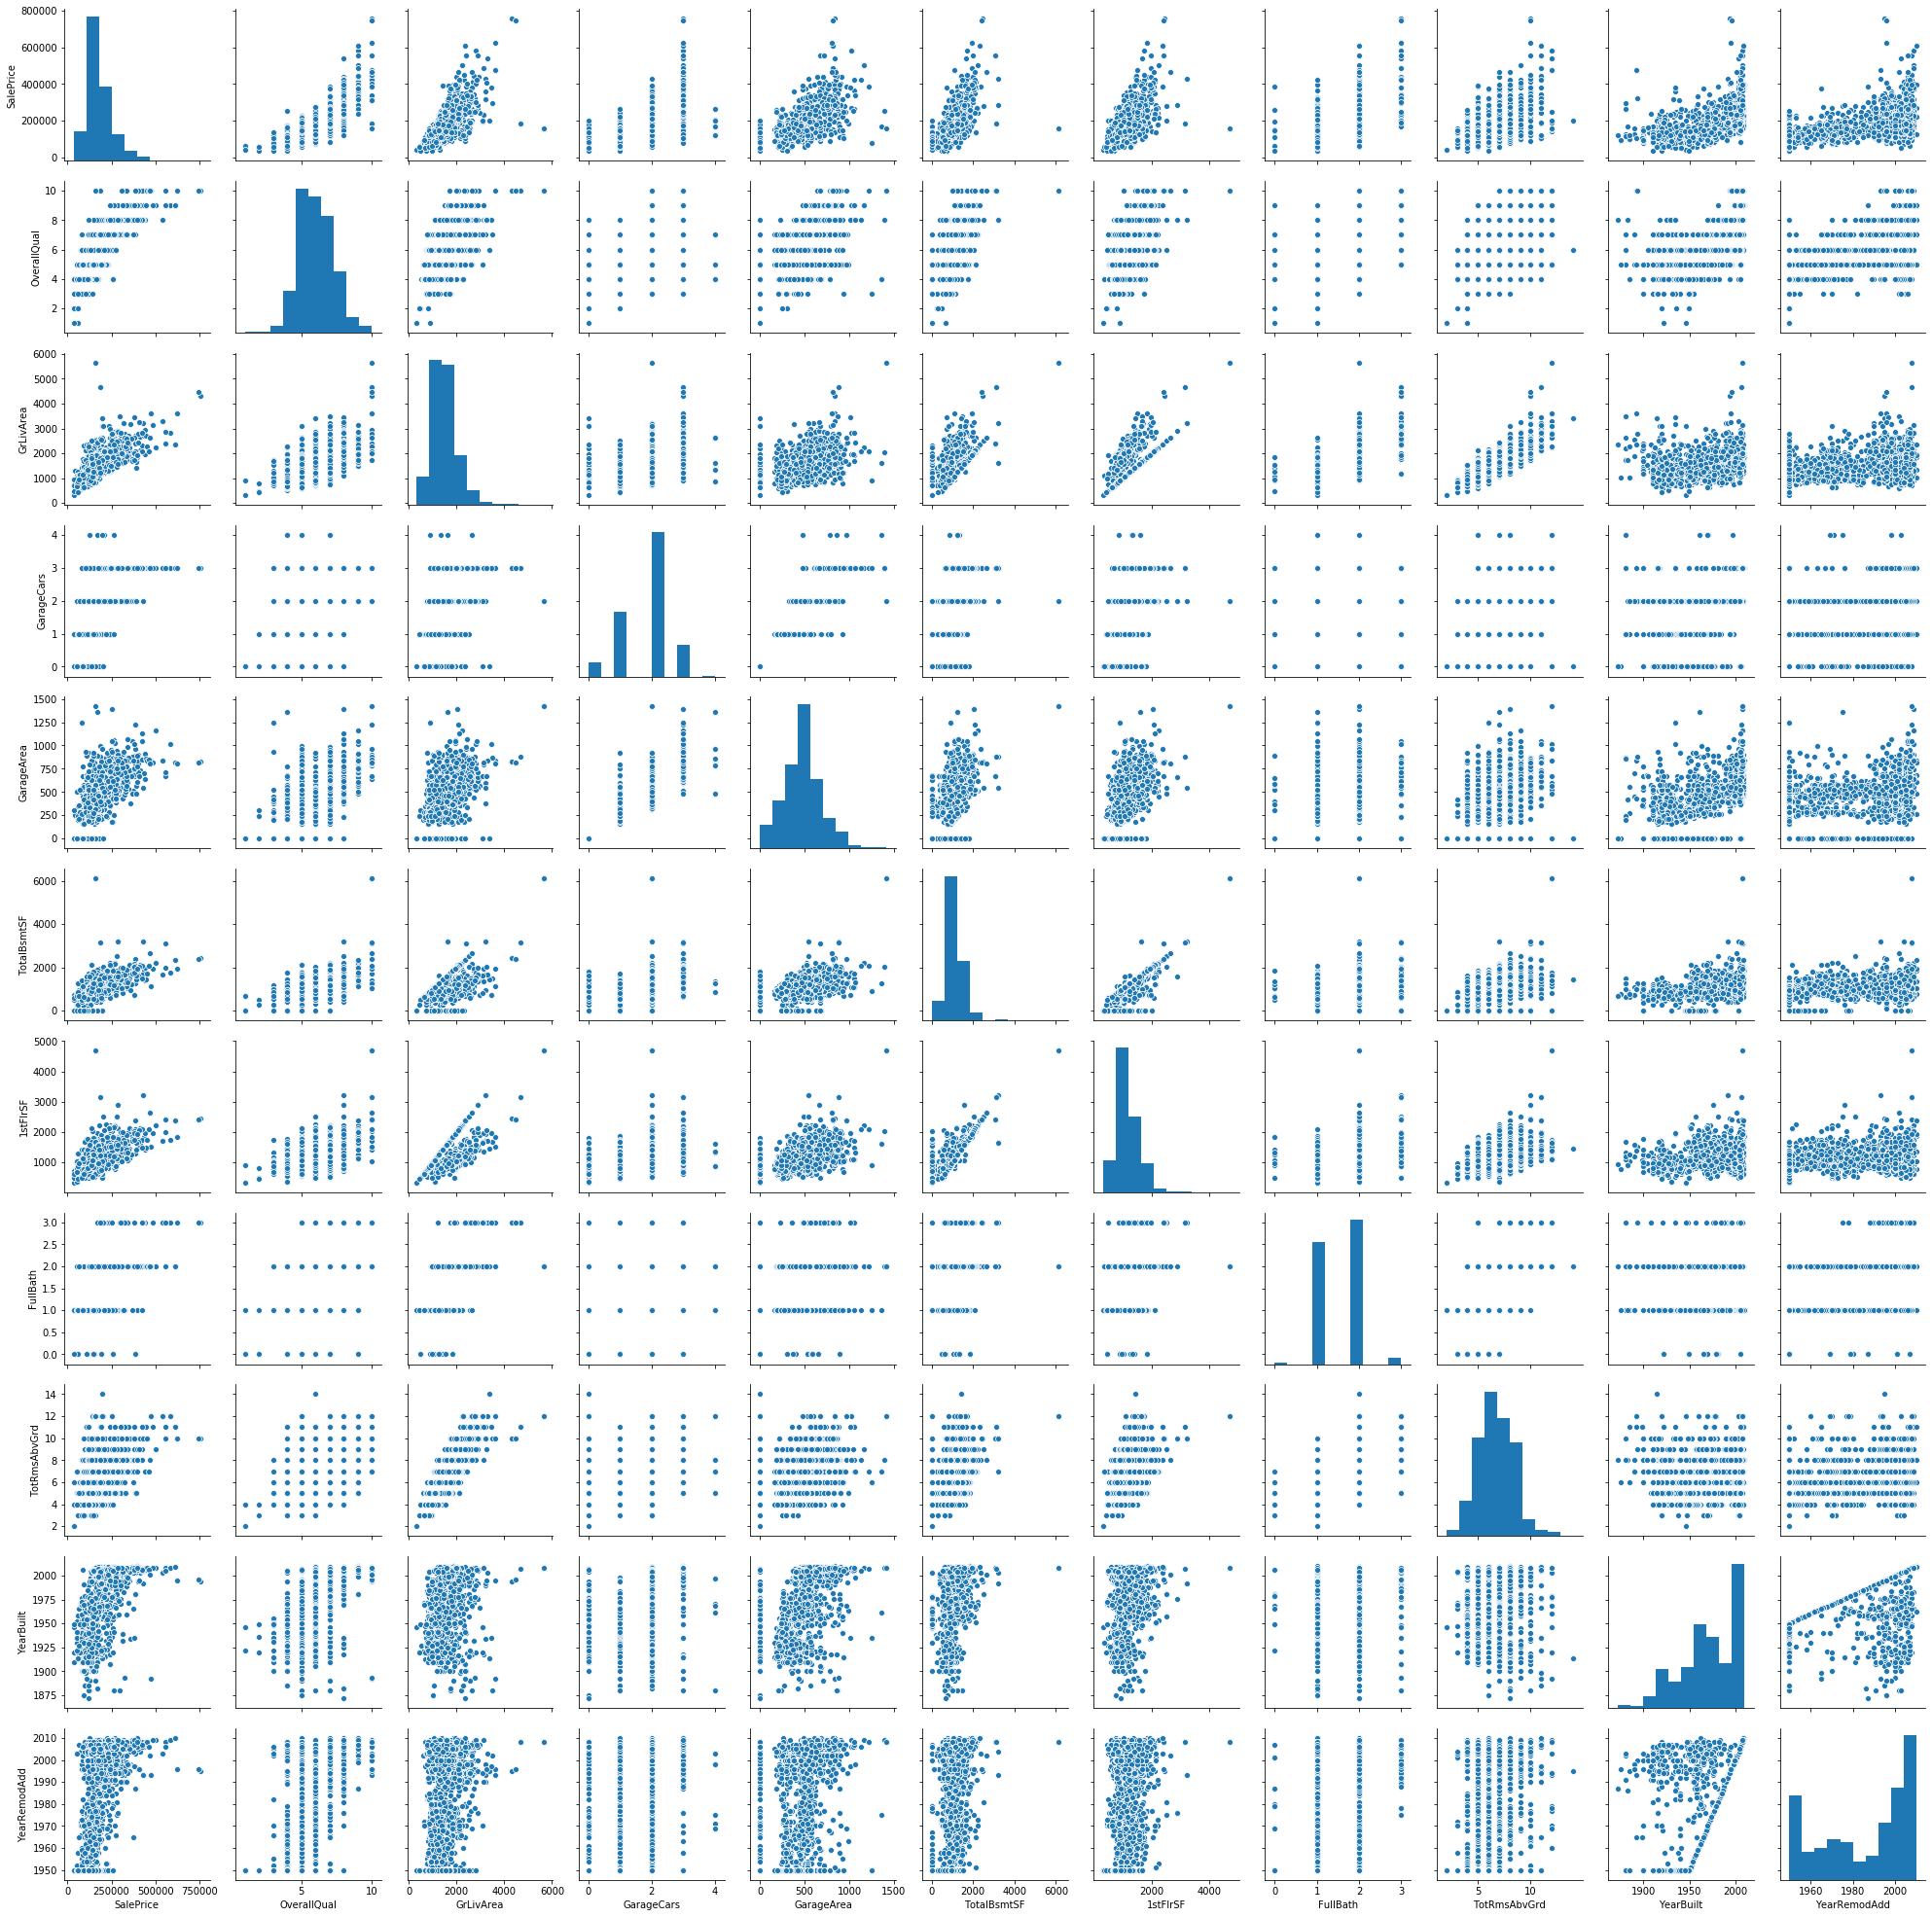

In [31]:
sns.pairplot(corr_data)

In [44]:
#Dividiré los datos en train y test

train, test = corr_data[:][:-10], corr_data[:][-10:]
cols

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

In [41]:
import statsmodels.api as sm

In [45]:
x = sm.add_constant(train[cols]) 
y = train['SalePrice']

In [46]:
res = sm.OLS(y, x).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     491.1
Date:                Sat, 11 Jan 2020   Prob (F-statistic):               0.00
Time:                        09:13:01   Log-Likelihood:                -17331.
No. Observations:                1449   AIC:                         3.468e+04
Df Residuals:                    1438   BIC:                         3.474e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.197e+06    1.3e+05     -9.181   

In [47]:
Los p-values son casi 0, excepto en TotRmsAbvGrd y GarageArea, por lo que se puede asegurar que las variables son significativas
para el precio de venta. La r cuadrada es muy cercana a 1 por lo que el modelo ajusta bastante bien.

Text(0.5, 1.0, 'Predicción de precios')

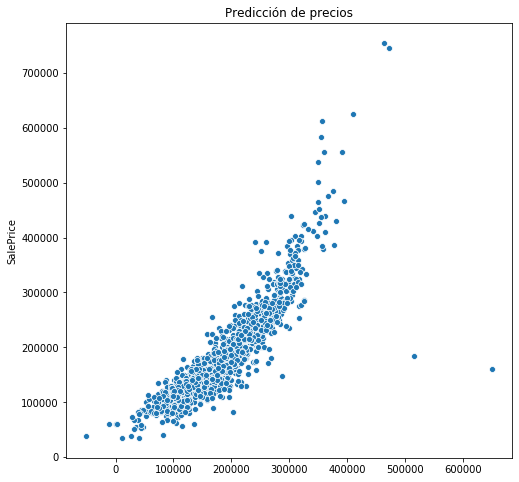

In [85]:
pred = res.predict()
plt.figure(figsize=(8,8))
sns.scatterplot(predict,train['SalePrice'])
plt.title('Predicción de precios')